# **Pima Indians Diabetes**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies → número entero de embarazos.
- Glucose → concentración de glucosa plasmática en sangre a las 2h en un test de tolerancia (mg/dL).
- BloodPressure → presión arterial diastólica (mm Hg).
- SkinThickness → grosor del pliegue cutáneo del tríceps (mm).
- Insulin → concentración sérica de insulina a las 2h (mu U/ml).
- BMI → índice de masa corporal = peso(kg) / altura(m)^2.
- DiabetesPedigreeFunction → puntaje que estima predisposición genética a diabetes (adimensional, sin unidades).
- Age → edad en años.
- Outcome → 0 = no diabético, 1 = diabético (variable binaria).

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

### **Loading Data**

In [ ]:
#reading data
df = pd.read_csv("Pima_Indians_Diabetes_Database.csv")

print("shape: ", df.shape)
print("columnas: ", df.columns.tolist())

df.head()

shape:  (768, 9)
columnas:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Tipos de datos y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Estadísticas descriptivas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#veryfing null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#buscando celdas en "cero"
#df == 0
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [ ]:
#columns where cero =  misisng data
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

#replacing zeros by NaN
df[missing_columns] = df[missing_columns].replace(0,np.nan)

#check again
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Handling missing Values

In this project, it was detected that several columns in the dataset contained "0", values that actually represent missing data (Glucose, BloodPressure, SkinThickness, Insulin, BMI).

Two version of the dataset were created to compare different imputation strategies:

1. **Imputation with median**
    - Justification: the median is more robust against extreme values than the mean.
    - Advantage: fast, simple, maintains the general distribution.

2. **Imputation with KNN (K Nearest Neighbors)**
    - Justification: Missing values are imputed based on similar observations in the dataset.
    - Advantage: better preserves the correlation structure between variables.
    - Disadvantage: higher computational cost.

Both dataseta will be used in the analysis and modeling to evaluate the impact of imputation technique on the results.



In [ ]:
from sklearn.impute import KNNImputer

#copying the dataset
df_median = df.copy()
df_knn = df.copy()

# 1. Imputation with Median
for i in missing_columns:
    median_value = df_median[i].median()
    df_median[i] = df_median[i].fillna(median_value)

# 2. Imputation with KNN
imputer = KNNImputer(n_neighbors=5) #5 neighbors is a common value
df_knn.iloc[:,:] = imputer.fit_transform(df_knn)



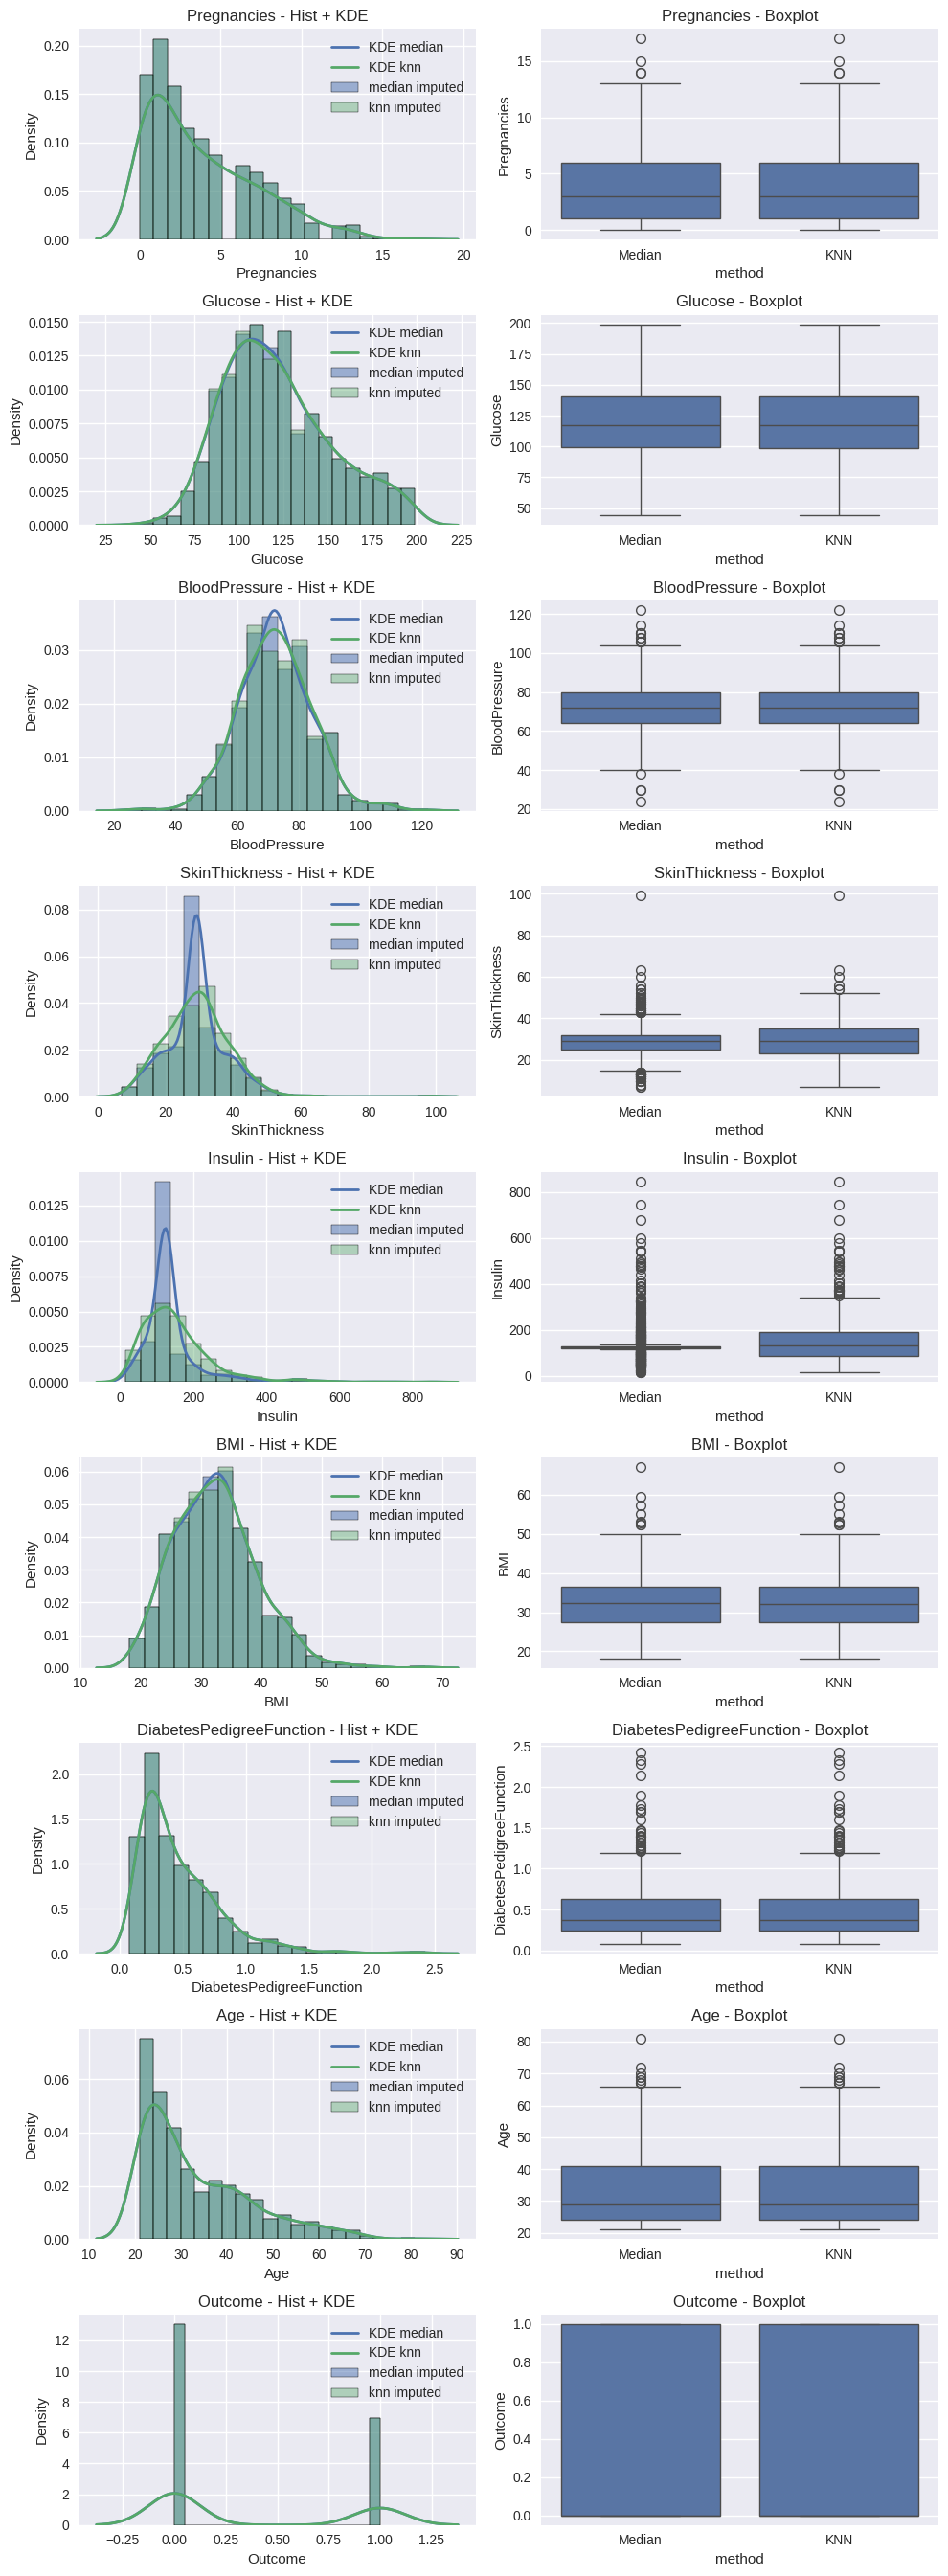

In [ ]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
nrows = len(cols)
ncols = 2
nbins=20

fig , axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols,3*nrows))
axes_flat = axes.ravel()

for i, header in enumerate(cols):
    #preparing concatenated df for the boxplots
    df_combined = pd.concat([df_median[[header]].assign(method='Median'), df_knn[[header]].assign(method='KNN')], ignore_index=True)

    #index for the subplot
    #Hist/Kde: the index will be [2*i]
    #Boxplot: the index will be [2*i + 1]
    ax_hist_kde = axes_flat[2*i]
    sns.histplot(data=df_median[header], stat="density", ax=ax_hist_kde, alpha=0.5, label="median imputed", bins=nbins)
    sns.histplot(data=df_knn[header], stat="density", ax=ax_hist_kde, alpha=0.4, label="knn imputed", bins=nbins)
    sns.kdeplot(data=df_median[header], lw=2, label="KDE median", ax=ax_hist_kde)
    sns.kdeplot(data=df_knn[header], lw=2, label="KDE knn", ax=ax_hist_kde)
    ax_hist_kde.set_title(f"{header} - Hist + KDE")
    ax_hist_kde.legend()

    ax_boxplot = axes_flat[2*i + 1 ]
    sns.boxplot(data=df_combined, x="method", y=cols[i], ax=ax_boxplot)
    ax_boxplot.set_title(f"{header} - Boxplot")

plt.tight_layout()
plt.show()


## Imputation and Distribution Comparison
Upon inspecting the hsitogram/KED - Boxplot graphs for each variable, clear patters emerge:

### Median Imputation
- Peak Problem: For varaibles with a high rate of zeros/NaN (such as insulin. SkinThickness, glucose), the KDE curve shows an artificially high and narrow peak exactly at the median value.
- Boxplot: The box generated by median imputation is noticibly narrower than the KNN, severely underestimating the true variability (standar deviation) of the variable.
- *Conclusion:* This method introduces strong bias into the dataset, misleading future modelsinto assuming that most values clusters around a single point (inaccurate assumption that leads to overfitting).

### KNN Imputation
- Distribution Preservation: The KDE from KNN is significantly smoother and more dispersed, without the artificialpeal. KNN achieves this by replacing each zero/NaN with a unique value based on the neighborhood of other variables.
- Boxplot: KNN boxes are wider, showing a realistic interquartile range and a median very close to that obtained throughpur emedian calculation (instilling condfidence in the central tendency).
- *Conclusion:* KNN preserves the original shape and variability of the distribution, making the dataset more suitable for inference and modeling.

It is concluded that *K-nearest Neighbors (KNN) Imputation* provides a much more faithful representation of the underlying reality of the data.


In [ ]:
df_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.598177,72.371354,29.114583,153.180208,32.427344,0.471876,33.240885,0.348958
std,3.369578,30.496543,12.206417,9.424100,98.385308,6.886588,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.900000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,133.700000,32.090000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.150000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### ScatterPlots + KDE

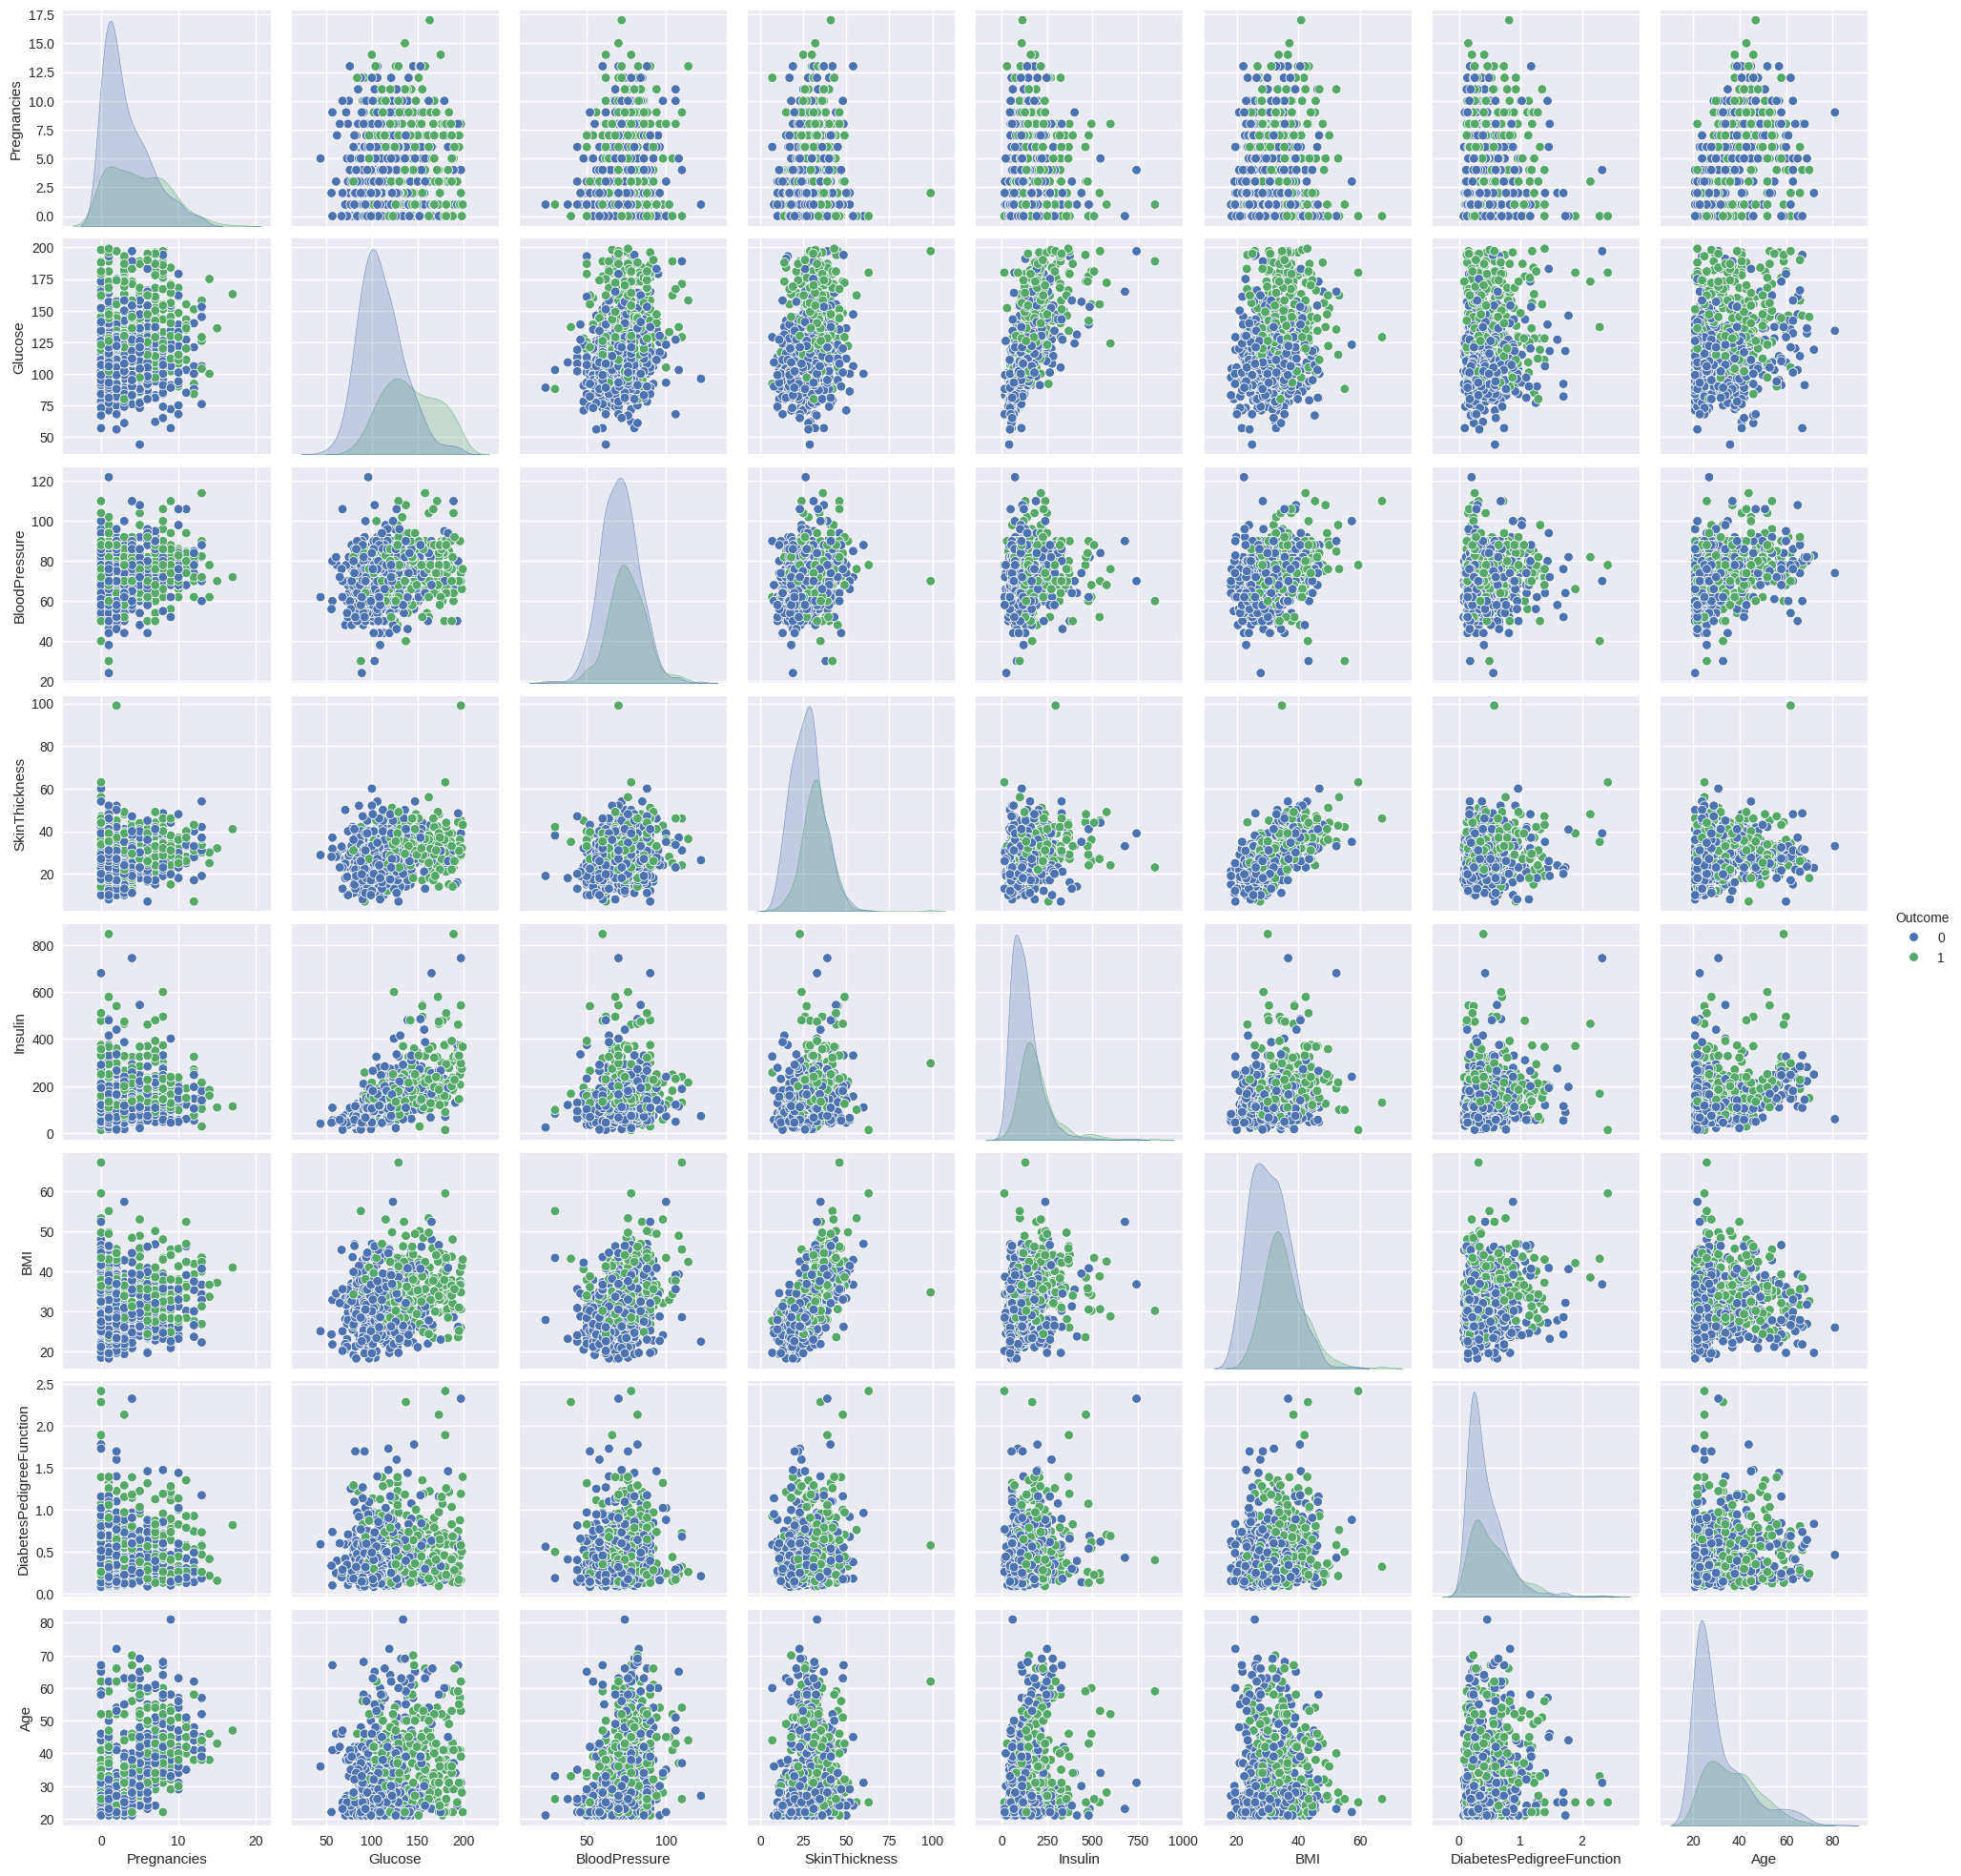

In [ ]:
#Revising scatterplots for the variables
sns.pairplot(data=df_knn, hue='Outcome', diag_kind='kde')
plt.show()

### **Shapiro-Wilk Normality Test**

In [ ]:
#Shapiro-Wilk normality test
shapiro_significance = 0.05
tested_columns = df_knn.drop(columns='Outcome').columns
shapiro_results = {}

for col in tested_columns:
    statistic_W , p_val = stats.shapiro(df_knn[col])
    if p_val < shapiro_significance:
        is_normal = 'reject H0 (not normal)'
    else:
        is_normal = 'accept H0 (is normal'
    shapiro_results[col] = {'Statistic': statistic_W, 'P-val': p_val, 'Is_normal':is_normal}

df_shapiro = pd.DataFrame(shapiro_results).T
df_shapiro

,Statistic,P-val,Is_normal
Pregnancies,0.904281,0.0,reject H0 (not normal)
Glucose,0.969457,0.0,reject H0 (not normal)
BloodPressure,0.989932,0.000041,reject H0 (not normal)
SkinThickness,0.971721,0.0,reject H0 (not normal)
Insulin,0.837486,0.0,reject H0 (not normal)
BMI,0.979153,0.0,reject H0 (not normal)
DiabetesPedigreeFunction,0.836518,0.0,reject H0 (not normal)
Age,0.874767,0.0,reject H0 (not normal)


### **HeatMaps**

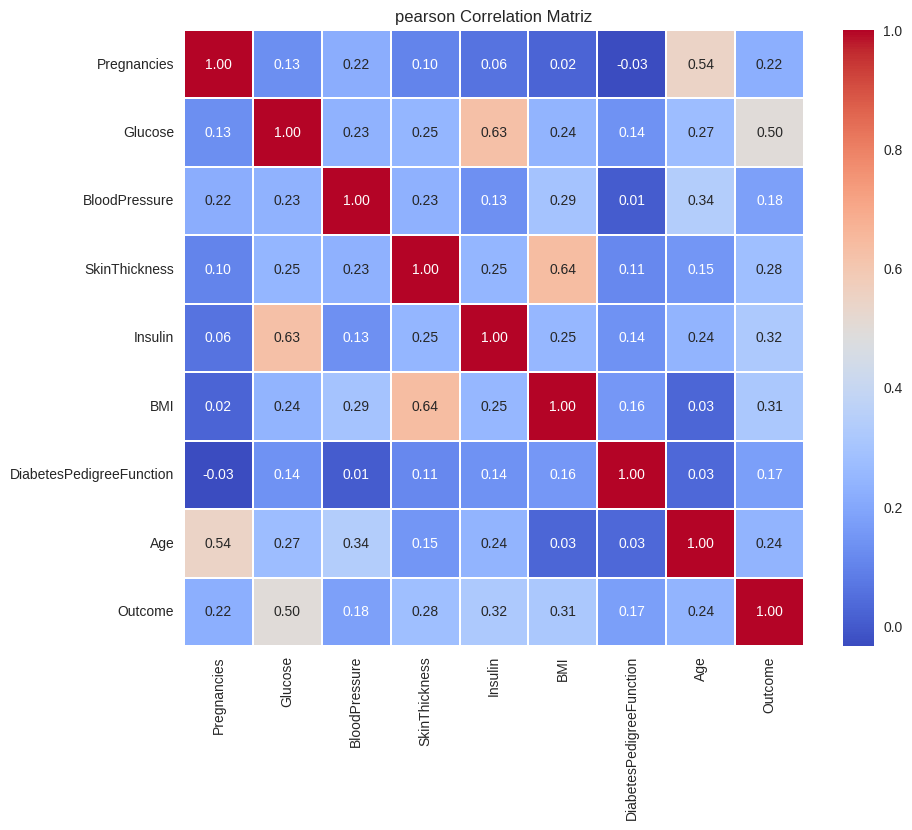

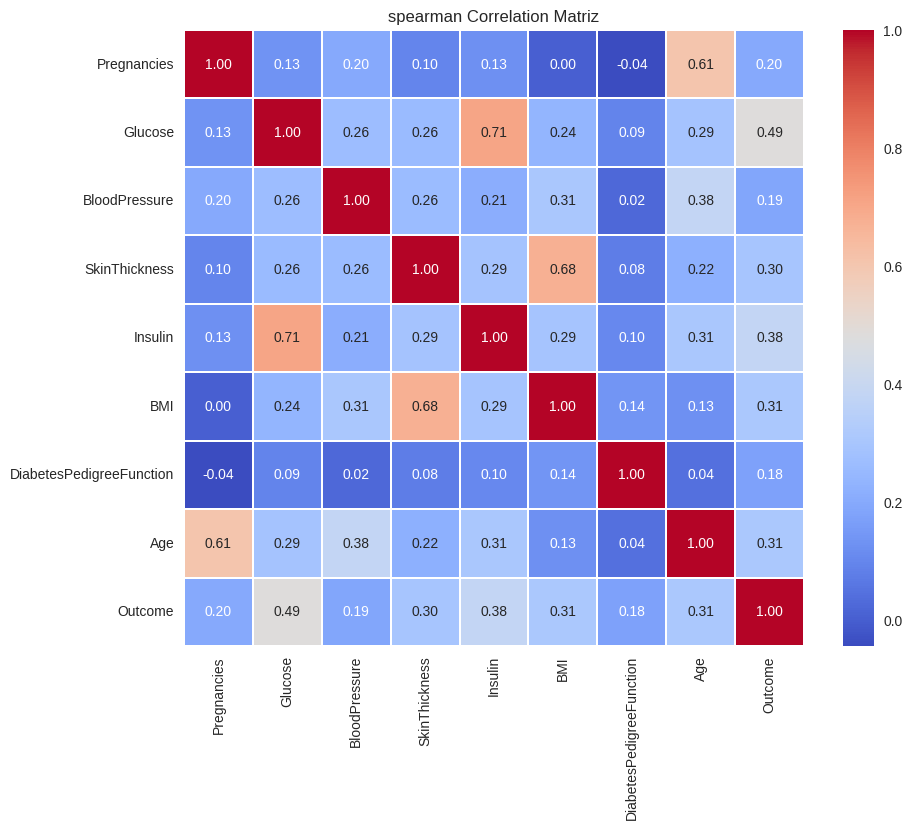

In [ ]:
#HeatMaps for correlation
corr_methods = ['pearson', 'spearman']


for m in corr_methods:
    plt.figure(figsize=(10,8))
    correlation_matrix = df_knn.corr(method=m)
    sns.heatmap(data=correlation_matrix, annot=True, fmt='.2f', linewidths=0.1, cbar=True, cmap='coolwarm')
    plt.title(f"{m} Correlation Matriz")
    plt.show()


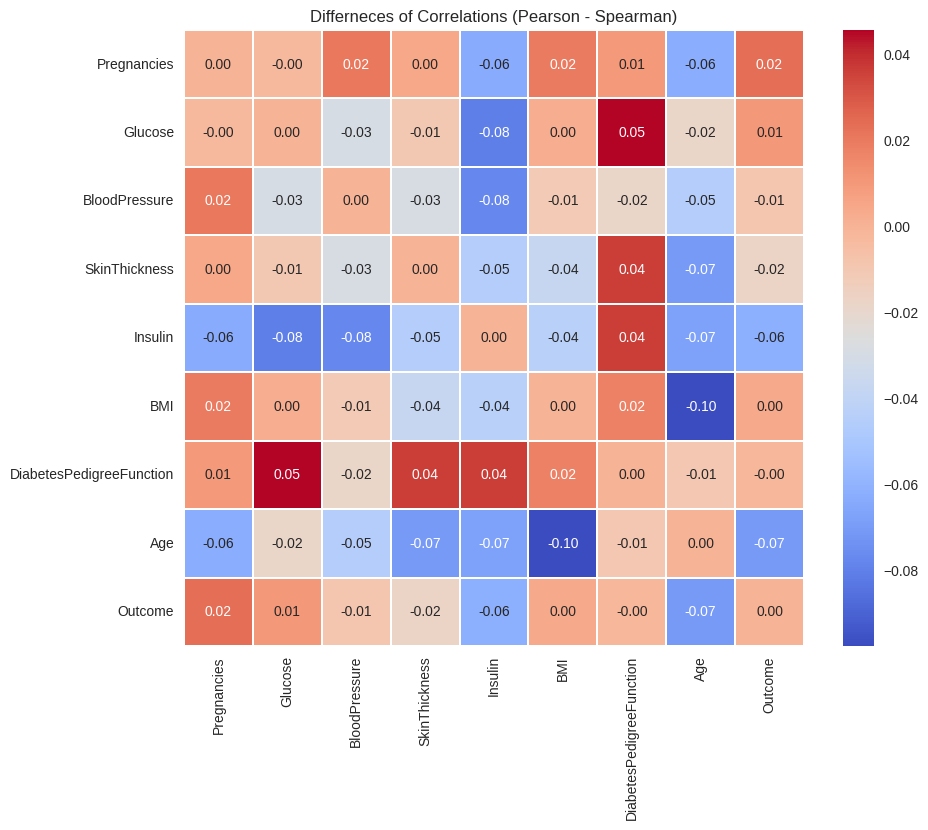

In [ ]:
p_corr = df_knn.corr(method='pearson')
s_corr = df_knn.corr(method='spearman')
df_diff = p_corr - s_corr

plt.figure(figsize=(10,8))
sns.heatmap(data=df_diff, annot=True, linewidths=0.2, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Differneces of Correlations (Pearson - Spearman)')
plt.show()


In [ ]:
#Calculating statistic significance of the correlations with spearman
rho_matriz, p_val_matriz = stats.spearmanr(df_knn)
df_p_val_spearman = pd.DataFrame(data=p_val_matriz, index=df_knn.columns, columns=df_knn.columns)
pd.set_option('display.float_format', lambda x: '%.2e' % x)
df_p_val_spearman



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,0.00e+00,1.95e-04,3.41e-08,6.67e-03,4.96e-04,9.13e-01,2.31e-01,1.45e-78,2.81e-08
Glucose,1.95e-04,0.00e+00,1.14e-13,4.69e-13,3.31e-118,3.53e-11,9.38e-03,3.36e-16,1.12e-46
BloodPressure,3.41e-08,1.14e-13,0.00e+00,2.76e-13,2.90e-09,4.32e-18,4.95e-01,2.93e-28,2.28e-07
SkinThickness,6.67e-03,4.69e-13,2.76e-13,0.00e+00,2.26e-16,5.02e-104,3.19e-02,6.97e-10,4.29e-17
Insulin,4.96e-04,3.31e-118,2.90e-09,2.26e-16,0.00e+00,7.50e-17,4.04e-03,4.88e-18,4.78e-28
BMI,9.13e-01,3.53e-11,4.32e-18,5.02e-104,7.50e-17,0.00e+00,1.32e-04,4.01e-04,1.39e-18
DiabetesPedigreeFunction,2.31e-01,9.38e-03,4.95e-01,3.19e-02,4.04e-03,1.32e-04,0.00e+00,2.35e-01,1.01e-06
Age,1.45e-78,3.36e-16,2.93e-28,6.97e-10,4.88e-18,4.01e-04,2.35e-01,0.00e+00,1.85e-18
Outcome,2.81e-08,1.12e-46,2.28e-07,4.29e-17,4.78e-28,1.39e-18,1.01e-06,1.85e-18,0.00e+00


In [ ]:
pd.reset_option('display.float_format')

## **Exploratory Data Analysis (EDA)**

### Scatter Plots and Kernel Density Estimation (KDE)

Scatter plots were generated for all variables, with points separated by class (green = diabetic, blue = non-diabetic).  
On the diagonal, the Kernel Density Estimation (KDE) curves represent the Probability Density Function (PDF) for each variable and class.

All variables show a **right-skewed distribution** (positive skewness).  
Notably, the **Glucose** variable concentrates at higher values for diabetic individuals — an expected and clinically meaningful pattern.  

Similarly, **BMI**, **DiabetesPedigreeFunction**, **Age**, and **Insulin** display longer right tails in the diabetic group, indicating stronger asymmetry and heavier upper distributions.



### Heatmaps: Pearson vs. Spearman Correlations

Three correlation matrices were computed and visualized as heatmaps:

1. **Pearson correlation**
2. **Spearman correlation**
3. **Difference matrix** (Pearson – Spearman)

The **Pearson correlation** measures **linear** relationships between continuous variables, while **Spearman** detects **monotonic** associations, regardless of linearity.  Since the target variable **Outcome** is categorical (0 = non-diabetic, 1 = diabetic), its correlation under Pearson is interpreted as a **point-biserial correlation**.

### Results and Interpretation

- Both Pearson and Spearman correlations show consistent trends.  
- The strongest associations with **Outcome** are:
  - **Glucose** → ~0.50  
  - **Insulin** → ~0.32  
  - **BMI** → ~0.31  

The difference matrix reveals that the maximum deviation between Pearson and Spearman was around **−0.10**, and for **Age vs. Outcome**, ≈ −0.07.  
This indicates that most relationships are **monotonic-linear**, meaning that the rank-based and linear relationships align closely.

### Methodological Note

The **Shapiro–Wilk test** showed that none of the variables follow a normal distribution. For that reason, **non-parametric methods (like Spearman)** were preferred for correlation inference, especially under non-normal or small-sample conditions.

However, given the large sample size (n = 768), the **Central Limit Theorem (CLT)** ensures that the distribution of sample means tends to normality. Thus, **parametric tests (e.g., t-test, ANOVA)** could still be valid in further inferential analysis **if** provided assumptions like homoscedasticity are verified.


### Multicollinearity Analysis

Spearman’s matrix also revealed significant correlations **among predictor variables**, which may introduce **multicollinearity** in future modeling stages (e.g., logistic regression).  
Strong pairwise associations include:

- **Glucose vs. Insulin:** ρ ≈ 0.71  
- **BMI vs. SkinThickness:** ρ ≈ 0.68  
- **Pregnancies vs. Age:** ρ ≈ 0.61  

Such relationships suggest that some predictors carry overlapping information, which could cause instability or inflated variance in regression coefficients.  
Feature selection, dimensionality reduction, or regularization techniques (e.g., LASSO) should be considered to mitigate this effect.



### Statistical Significance of Spearman Correlations

Below the difference matrix, the **p-values** associated with Spearman’s rank correlations are displayed.
  
The correlations between each predictor and the **Outcome** variable have **extremely low p-values** (ranging from 10⁻⁶ to ~0), all well below the significance threshold **α = 0.05**.

Therefore, the null hypothesis of independence is rejected, indicating that the observed relationships are **statistically significant** and **not due to random chance**.


# **Inference: Mann–Whitney Test**

The variables selected for inference were based on the strength of correlation estimated with the Spearman correlation matrix, selecting those variables with the strongest relationship to the 'Outcome' variable (diabetic / non-diabetic):

- Glucose vs Outcome: ρ = 0.49  
- Insulin vs Outcome: ρ = 0.38  
- BMI vs Outcome: ρ = 0.31  
- Age vs Outcome: ρ = 0.31  

The remaining variables were excluded due to their low correlation with 'Outcome'.  
The variable 'SkinThickness' was excluded due to collinearity with 'BMI'.

### **Hypotheses**

- **H0:** The distribution of [Variable] is the same for both groups (Outcome = 0 and Outcome = 1).  
- **HA:** The distribution of [Variable] is different for both groups (Outcome = 0 and Outcome = 1).

In [ ]:
#Mann-Withney Test
inference_cols = ['Glucose', 'Insulin', 'BMI', 'Age']
withney_alpha = 0.05
withney_results = {}

for var in inference_cols:
    group0 = df_knn[df_knn['Outcome'] == 0][var]
    group1 = df_knn[df_knn['Outcome'] == 1][var]

    # Mann-Whitney Test
    withney_statistic, p_val_mann = stats.mannwhitneyu(group0, group1, alternative='two-sided')
    #r effect
    n0, n1 = len(group0), len(group1)
    N = n0 + n1
    #Z estimation
    z = stats.norm.isf(p_val_mann / 2) * (1 if group1.median() > group0.median() else -1)
    r_effect = z / math.sqrt(N)

    conclusion = 'Reject H0 (Significant difference)' if p_val_mann < withney_alpha else 'Do NOT Reject H0 (No significant difference)'

    withney_results[var] = {
        'U Statistic': withney_statistic,
        'p_value': f"{p_val_mann:.2e}",
        'z_score': round(z, 4),
        'Conclusion': conclusion,
        'Effect size (r)': round(r_effect, 3),
        'Median_Outcome0': round(group0.median(), 2),
        'Median_Outcome1': round(group1.median(), 2)
        }

df_inference_withney = pd.DataFrame(withney_results).T
df_inference_withney


,U Statistic,p_value,z_score,Conclusion,Effect size (r),Median_Outcome0,Median_Outcome1
Glucose,27597.5,3.21e-41,13.447,Reject H0 (Significant difference),0.485,107.0,140.0
Insulin,36021.5,4.04e-26,10.5714,Reject H0 (Significant difference),0.381,113.1,169.2
BMI,41833.0,8.82e-18,8.5883,Reject H0 (Significant difference),0.31,30.1,34.3
Age,41950.0,1.14e-17,8.5586,Reject H0 (Significant difference),0.309,27.0,36.0


## **Mann–Whitney U Test Analys**

Extremely low p-values (p << 0.05) indicate that the null hypothesis (H0) is rejected for all four variables. This confirms that the observed differences in medians between the groups are statistically significant and not due to random chance.

### 1. Glucose

- Shows the most significant difference between both groups (**p < 0.000001**).
- The effect size (**r = 0.485**) indicates a strong association between higher glucose levels and the presence of diabetes.
- The medians show a substantial clinical increase (**107 → 140**).

### 2. Insulin

- Highly significant difference (**p < 0.000001**).
- Moderate-to-high effect (**r = 0.381**), indicating an important relationship with diabetes.
- Higher median in diabetic patients, suggesting insulin resistance or compensatory hyperinsulinemia.


### 3. BMI (Body Mass Index)

- Statistically significant difference (**p < 0.000001**).
- Moderate effect size (**r = 0.31**), indicating that overweight/obesity increases the likelihood of having diabetes.
- The median increases from **30.1 (overweight)** to **34.3 (obese)**.


### 4. Age

- Significant difference (**p < 0.000001**).
- Moderate effect size (**r = 0.309**), showing that diabetes is more prevalent with age.
- The median increases from **27** to **36 years**, reflecting a growing risk with adulthood.

### Effect size (r) quantifies the magnitude of these differences:

- **Glucose (r = 0.485)** shows a large effect, reaffirming its role as the most discriminative predictor. The median glucose level is substantially higher in the diabetic group.
- **Insulin, BMI, and Age (r > 0.30)** show medium-sized effects, indicating that differences in these variables are also practically relevant for distinguishing between the two groups.

These findings provide strong statistical justification for including all four variables in the subsequent predictive modeling phase.


# **Inference: Chi Square ($\chi^2$) Test**

As a complementary analysis, a Chi-Square ($\chi^2$) Test of Independence is conducted to evaluate whether there is a statistically significant association between categorized versions of key predictors and the outcome.

## 1. Discretization (Binning) of Continuous Variables

To apply the Chi-Square test, the following continuous variables will be transformed into categories using standard clinical criteria:

- **Glucose**: low [0, 69), normal [69, 99), prediabetes [99, 125), diabetes [125, 125+) based on clinical thresholds.
- **BMI**: lightweight [0, 18.5), normal [18.5, 25), overweight [25, 30), obese [30, 30+) according to OMS ranges.
- **Age**: young adult [21–34), adult [35–50), older adult [50–65), elderly [65, 65+) to group by life stages.

## 2. Chi-Square Test Hypotheses

- **HO**: The [Categorized Variable] and the diabetes outcome are independent (no association).
- **HA**: The [Categorized Variable] and the diabetes outcome are associated.

## 3. Purpose

This analysis aims to confirm, from a frequency-based perspective, whether belonging to certain categories (e.g., 'Obese', 'Diabetes-level Glucose') significantly increases or decreases the observed probability of having diabetes (Outcome = 1), complementing the findings from the Mann-Whitney U test on continuous distributions.

Cramér’s V will also be calculated as a measure of effect size (strength of association).


In [ ]:
#Making copy of our data
df_chi2 = df_knn.copy()

#Defining bins and labels for category
clinical_bins = {
    'Glucose': {
        'bins': [0, 69, 99, 125, np.inf],
        'labels': ['low', 'normal', 'prediabetes', 'diabetes']
    },
    'BMI': {
        'bins': [0, 18.5, 25, 30, np.inf],
        'labels': ['lightweight', 'normal', 'overweight', 'obese']
    },
    'Age': {
        'bins':[21, 35, 50, 65, np.inf],
        'labels':['young adult (21-34)', 'adult (35-50)', 'older adult (50-65)', 'elderly (65+)']
    }
}

chi2_alpha = 0.05
chi2_stats_results = {}

for col_name, values in clinical_bins.items():
    #create the new variable name for each category for the Bining and adding it up to the df
    new_col_name = col_name + '_cat'
    df_chi2[new_col_name] = pd.cut(x=df_chi2[col_name], bins=values['bins'], labels=values['labels'],right=False, include_lowest=True)

    #create the contingecy table
    contingecy_table = pd.crosstab(index=df_chi2[new_col_name], columns=df_chi2['Outcome'])

    #chi2 test
    x2_stat, p_val, dof, expected_freq = stats.chi2_contingency(observed=contingecy_table, correction=True)

    #calculating the effect (V Cramer)
    N = contingecy_table.sum().sum()
    k, r = contingecy_table.shape
    v_cramer = np.sqrt(x2_stat / (N * min(k - 1, r - 1)))

    #Determining the V_Cramer effect
    if v_cramer < 0.2:
        magnitude = 'low'
    elif v_cramer < 0.4:
        magnitude = 'moderate'
    else:
        magnitude = 'Strong'

    #test conclusion
    conclusion = 'Reject H0 (Associated)' if p_val < chi2_alpha else 'Do NOT Reject H0 (Independents)'

    #saving results
    chi2_stats_results[col_name] = {
        'x2_stat': x2_stat,
        'p_value': f"{p_val:.2e}",
        'Conclusion': conclusion,
        'V_Cramer':round(v_cramer, 2),
        'effect': magnitude
    }

df_chi2_results = pd.DataFrame(data=chi2_stats_results).T
df_chi2_results

,x2_stat,p_value,Conclusion,V_Cramer,effect
Glucose,150.473755,2.08e-32,Reject H0 (Associated),0.44,Strong
BMI,77.088899,1.29e-16,Reject H0 (Associated),0.32,moderate
Age,53.531837,1.41e-11,Reject H0 (Associated),0.26,moderate


In [ ]:
#Printing contingecy tables
for col_name, value in clinical_bins.items():
    col_cat_name = col_name + '_cat'
    print(f"Contingecy Table for: {col_name} Vs Outcome")
    display(pd.crosstab(index=df_chi2[col_cat_name], columns=df_chi2['Outcome']))
    print()

Contingecy Table for: Glucose Vs Outcome


Outcome,0,1
Glucose_cat,,
low,11,0
normal,153,14
prediabetes,208,69
diabetes,128,185



Contingecy Table for: BMI Vs Outcome


Outcome,0,1
BMI_cat,,
lightweight,4,0
normal,95,7
overweight,144,41
obese,257,220



Contingecy Table for: Age Vs Outcome


Outcome,0,1
Age_cat,,
young adult (21-34),362,126
adult (35-50),92,99
older adult (50-65),34,39
elderly (65+),12,4


# **Chi Square ($\chi^2$) Test Analysis**

### **Statistical Significance**

The extremely low p-values (p << 0.05) for the three variables indicate that we reject the null hypothesis (H0) of independence. This means there is a statistically significant association between belonging to a specific category (e.g., 'Daiabtes - Glucose level', 'Obese', 'Older Adult') and having diabetes (Outcome = 1). The relationship is **NOT** due to chance.


### **Strength of Association (Cramér’s V)**

- **Glucose (V = 0.44)**: Shows a strong association. Glucose categories (normal, prediabetes, diabetes) are strongly linked to the diabetes outcome. This confirms, from a categorical perspective, that glucose is the most discriminative factor.  

- **BMI (V = 0.32) and Age (V = 0.26)**: Show moderate associations. Being obese or belonging to an older age group is significantly associated with diabetes, but the strength of this relationship is weaker than that of glucose.



## **General Conclusion**

The Chi-Square ($\chi^2$) Test complements the findings of the Mann-Whitney U Test.

It confirms that even when continuous variables are grouped into clinically relevant categories, the association with the outcome persists and remains significant.

Glucose continues to stand out as the factor with the strongest association.

# Levene test

In [ ]:
#Variance Homogeneity test
inference_cols = ['Glucose', 'Insulin', 'BMI', 'Age']
levene_alpha = 0.05
levene_results = {}
center = 'mean'

for col in inference_cols:
    G0 = df_knn[df['Outcome'] == 0][col]
    G1 = df_knn[df['Outcome'] == 1][col]
    levene_stast, p_val = stats.levene(G0, G1, center=center)
    if p_val < levene_alpha:
        result = 'Reject H0 (varainces are NOT Equal)'
        test = 'Welch t-test'
    else:
        result = 'Do NOT Reject H0 (varainces are Equal'
        test = 't-test'

    levene_results[col] = {'levene_stats': levene_stast , 'p_val': p_val, 'conclusion': result, 'test': test}

df_levene = pd.DataFrame(data=levene_results).T
df_levene

,levene_stats,p_val,conclusion,test
Glucose,22.994767,0.000002,Reject H0 (varainces are NOT Equal),Welch t-test
Insulin,7.848808,0.005214,Reject H0 (varainces are NOT Equal),Welch t-test
BMI,0.78147,0.376969,Do NOT Reject H0 (varainces are Equal,t-test
Age,0.048969,0.824925,Do NOT Reject H0 (varainces are Equal,t-test


### **Levene’s Test and Choice of Statistical Method**

Levene’s test revealed that the variables **Glucose** and **Insulin** show significant differences in their variances between groups, which invalidates the assumption of homoscedasticity required to apply a classical t-test.  

In contrast, the variables **BMI** and **Age** meet this assumption; however, the **Mann–Whitney U test** was chosen instead, since normality of the data distribution could not be guaranteed.  

This decision provides a more robust and consistent analysis, especially in the presence of skewness and outliers.

# Task
Train a classification model using df_knn.

## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

X = df_knn.drop('Outcome', axis=1)
y = df_knn['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Scale the data

### Subtask:
Scale the features using a suitable method like StandardScaler.


**Reasoning**:
Scale the features using StandardScaler.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and evaluate different models

### Subtask:
Train and evaluate different classification models (e.g., Logistic Regression, Support Vector Machines, Random Forest) on the scaled data.


**Reasoning**:
Import necessary models, train and evaluate them on the scaled data, and print the evaluation metrics.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
log_reg = LogisticRegression(random_state=42)
svc = SVC(probability=True, random_state=42) # probability=True for ROC AUC
rf_clf = RandomForestClassifier(random_state=42)

models = {
    'Logistic Regression': log_reg,
    'Support Vector Machine': svc,
    'Random Forest': rf_clf
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    try:
        # ROC AUC requires probability predictions
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    except AttributeError:
        roc_auc = "N/A" # Some models don't support predict_proba

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Print the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}" if isinstance(value, float) else f"{metric}: {value}")
    print("-" * (len(name) + 6))


--- Logistic Regression ---
Accuracy: 0.7292
Precision: 0.6269
Recall: 0.6087
F1-score: 0.6176
ROC AUC: 0.7925
-------------------------
--- Support Vector Machine ---
Accuracy: 0.7344
Precision: 0.6406
Recall: 0.5942
F1-score: 0.6165
ROC AUC: 0.7718
----------------------------
--- Random Forest ---
Accuracy: 0.7135
Precision: 0.5921
Recall: 0.6522
F1-score: 0.6207
ROC AUC: 0.7972
-------------------


## Evaluate the best model

### Subtask:
Choose the best performing model and evaluate it on the test set.


**Reasoning**:
Identify the best performing model based on the evaluation metrics and evaluate it on the test set.



In [ ]:
# Based on the previous results:
# Logistic Regression: ROC AUC: 0.7925, F1-score: 0.6176, Accuracy: 0.7292
# Support Vector Machine: ROC AUC: 0.7718, F1-score: 0.6165, Accuracy: 0.7344
# Random Forest: ROC AUC: 0.7972, F1-score: 0.6207, Accuracy: 0.7135

# Random Forest has the highest ROC AUC and F1-score, which are good indicators for imbalanced datasets.
best_model_name = 'Random Forest'
best_model = models[best_model_name]

# Predict on the test set using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Calculate and print evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
try:
    y_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]
    roc_auc_best = roc_auc_score(y_test, y_proba_best)
except AttributeError:
    roc_auc_best = "N/A"

print(f"--- Evaluation of the Best Model ({best_model_name}) on the Test Set ---")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-score: {f1_best:.4f}")
print(f"ROC AUC: {roc_auc_best:.4f}" if isinstance(roc_auc_best, float) else f"ROC AUC: {roc_auc_best}")
print("-" * (len(best_model_name) + 44))

--- Evaluation of the Best Model (Random Forest) on the Test Set ---
Accuracy: 0.7135
Precision: 0.5921
Recall: 0.6522
F1-score: 0.6207
ROC AUC: 0.7972
---------------------------------------------------------


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Summary:

### Data Analysis Key Findings

*   The data was successfully split into training (75%) and testing (25%) sets.
*   Features were scaled using `StandardScaler`.
*   Three classification models (Logistic Regression, Support Vector Machine, and Random Forest) were trained and evaluated.
*   Random Forest showed the highest ROC AUC (0.7972) and F1-score (0.6207) on the test set compared to Logistic Regression (ROC AUC: 0.7925, F1-score: 0.6176) and Support Vector Machine (ROC AUC: 0.7718, F1-score: 0.6165).
*   The final evaluation of the best model (Random Forest) on the test set resulted in an Accuracy of 0.7135, Precision of 0.5921, Recall of 0.6522, F1-score of 0.6207, and ROC AUC of 0.7972.

### Insights or Next Steps

*   Random Forest appears to be the most suitable model among those tested for this classification task based on its performance metrics, particularly ROC AUC and F1-score.
*   Further optimization of the Random Forest model through hyperparameter tuning could potentially improve its performance.
